# Nomes de bebês americanos de 1880 a 2010

### Com esse conjunto de dados podemos visualizar a proporção de bebês, dando um nome em particular (por exemplo eu coloquei meu nome para pode saber a proporção de bebês com o nome de Guilherme);

### Determinar os nomes mais populares a cada ano ou saber os nomes cuja popularidade aumentou ou diminuiu;

### Analisar tendencias nos nomes, como por exemplo diversidade entre os nomes, mudança na grafia e analise da primeira ou ultima letra;


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
from numpy import array


In [2]:
# Nesse começo trouxe apenas um dos arquivos para observar os dados
names_babys = pd.read_csv('yob1880.txt', names=['nome', 'sexo','quantidade'])

In [3]:
names_babys


,nome,sexo,quantidade
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# Fiz a soma da coluna de quantidade e agrupei por sexo
names_babys.groupby('sexo').quantidade.sum()

sexo
F     90994
M    110490
Name: quantidade, dtype: int64

In [5]:
# Como o conjunto de dados está separdo em arquivos por ano, então tive que juntar todos os arquivos em um unico DataFrame
# Adicionei também uma coluna de ano
anos = range(1880,2011)

lista = []
colunas = ['nome','sexo','quantidade']

for ano in anos:
    pacote = 'C:/Users/guilh/Desktop/Projeto_Guilherme/Nomes/yob%d.txt' % ano
    frame = pd.read_csv(pacote, names=colunas)
    
    frame['ano']=ano
    lista.append(frame)
    
    nomes_babys = pd.concat(lista,ignore_index=True)

In [6]:
# Aqui exibe a lista completa de todos os dados dos arquivos
#lista

In [7]:
nomes_babys

,nome,sexo,quantidade,ano
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [8]:
# Agora vou agregá-los em niveis de ano e sexo
total_anos = nomes_babys.pivot_table('quantidade',index='ano',columns='sexo',aggfunc=sum)

In [9]:
total_anos.tail()

sexo,F,M
ano,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


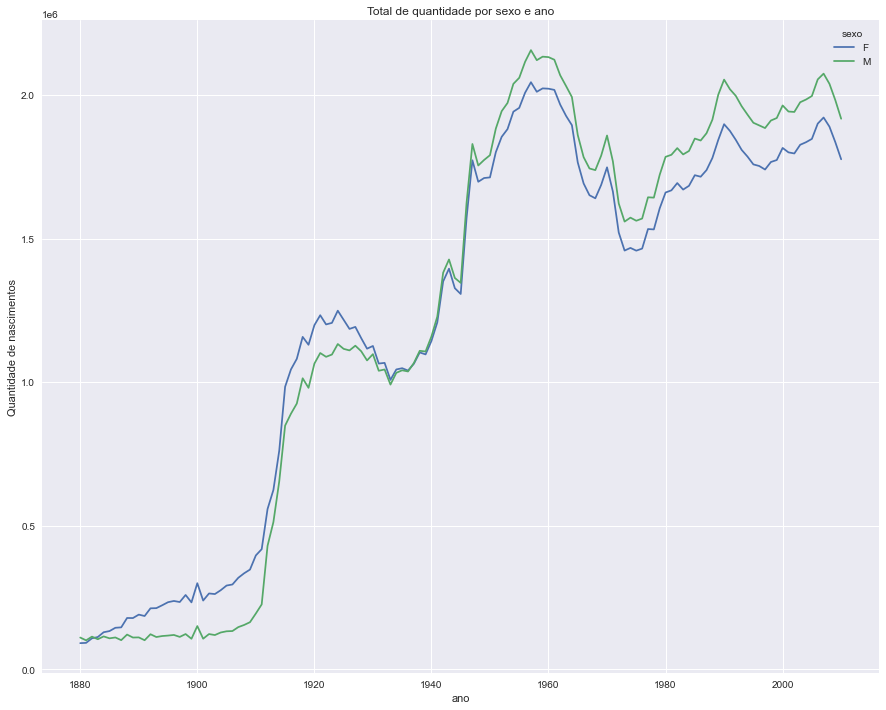

In [10]:
# Temos a primeira visualização mostrando o total de nascidos por ano e sexo
total_anos.plot(title='Total de quantidade por sexo e ano', figsize=(15,12))
plt.ylabel('Quantidade de nascimentos')
plt.show()


### Aqui podemos tirar varias conclusões e uma delas é que após 1940, nasciam mais meninos do que meninas

In [26]:
# Nesse trecho de código consigo saber quantos bebês tinham nascido com um teterminado nome
# Se quizer saber quantos bebês possuem seu nome, só digitá-lo aonde está em ('guilherme')
nome_certo = pd.Series(nomes_babys.nome.unique())

nome_qual = nome_certo[nome_certo.str.lower().str.contains('guilherme')]

nome_qual

14763    Guilherme
dtype: object

In [27]:
# Nessa parte adiciono uma coluna de porcentagem
def porcento(grupo):
    grupo['porcentagem'] = grupo.quantidade / grupo.quantidade.sum()
    return grupo
nomes_babys = nomes_babys.groupby(['ano','sexo']).apply(porcento)
    

In [28]:
nomes_babys

,nome,sexo,quantidade,ano,porcentagem
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


In [29]:
# Para saber que deu certo a operação anterior, preciso verificar se a coluna porcentagem tem soma igual a 1.
nomes_babys.groupby(['ano','sexo']).porcentagem.sum()

ano   sexo
1880  F       1.0
      M       1.0
1881  F       1.0
      M       1.0
1882  F       1.0
             ... 
2008  M       1.0
2009  F       1.0
      M       1.0
2010  F       1.0
      M       1.0
Name: porcentagem, Length: 262, dtype: float64

In [30]:
# Para facilitar as análises, extrairei um subconjunto com os 1.000(mil) primeiros nomes
def get_top(group):
    return group.sort_values(by='quantidade',ascending=False)[:1000]
grouped = nomes_babys.groupby(['ano','sexo'])
top_mil = grouped.apply(get_top)
top_mil.reset_index(inplace=True,drop=True)

In [31]:
top_mil

,nome,sexo,quantidade,ano,porcentagem
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


### Analisando tendências para os nomes 

In [32]:
# Separei os nomes em partes de meninos e meninas
meninos = top_mil[top_mil.sexo == 'M']
meninas = top_mil[top_mil.sexo == 'F']

In [33]:
# uma tabela pivô com o número total de nascimentos por ano e por nome
total_nascidos = top_mil.pivot_table('quantidade',index='ano',columns='nome',aggfunc=sum)

In [34]:
total_nascidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6870 entries, Aaden to Zuri
dtypes: float64(6870)
memory usage: 6.9 MB


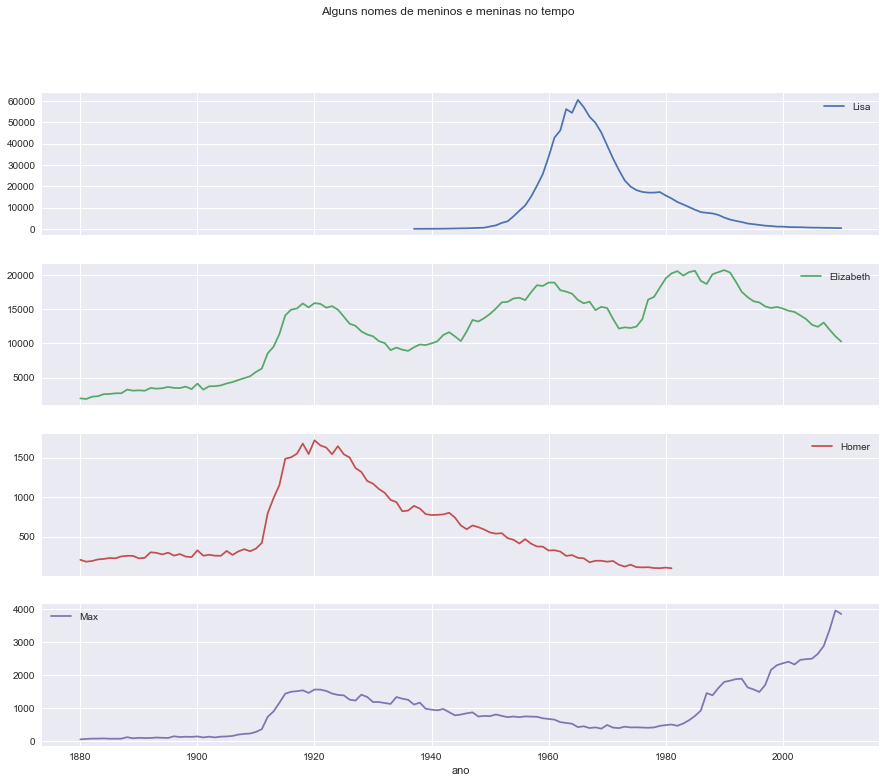

In [35]:
# Uma visualização com alguns nomes de meninos e meninas no tempo
subset = total_nascidos[['Lisa','Elizabeth','Homer','Max']]

subset.plot(subplots=True, figsize=(15,12),grid=True,title='Alguns nomes de meninos e meninas no tempo')

plt.show()

In [36]:
Lisa = total_nascidos[['Lisa']]
Elizabeth = total_nascidos[['Elizabeth']]
Homer = total_nascidos[['Homer']]
Max = total_nascidos[['Max']]

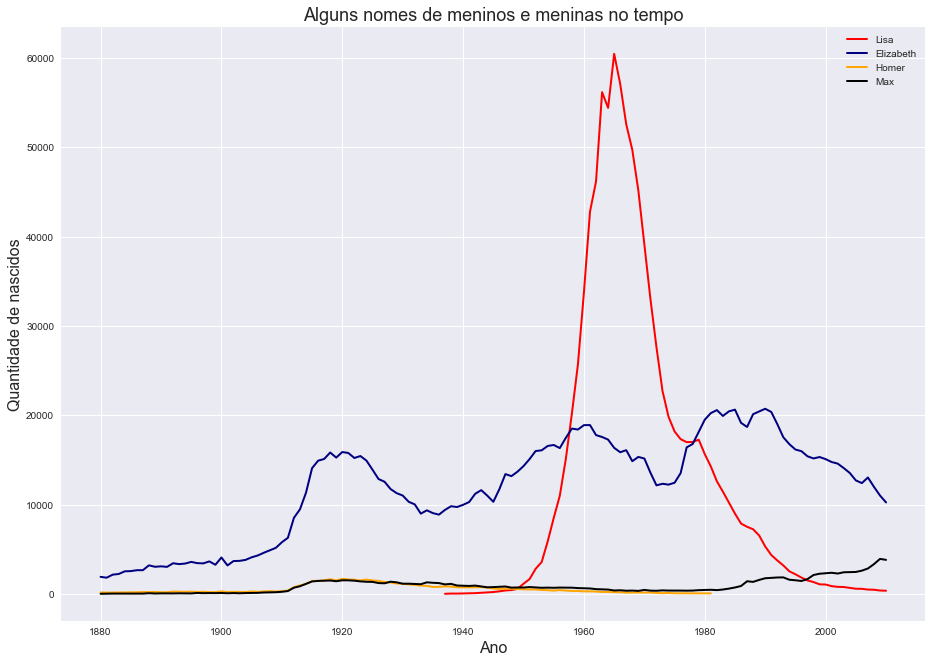

In [37]:
# Aqui é a mesma visualização de antes, só que agora fiz uma comparação em um único gráfico
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])
ax.plot(Lisa, color ='red', linewidth = 2, label = 'Lisa')

ax.plot(Elizabeth, color ='navy', linewidth = 2, label = 'Elizabeth')

ax.plot(Homer, color ='orange', linewidth = 2, label = 'Homer')

ax.plot(Max, color ='black', linewidth = 2, label = 'Max')

ax.set_title('Alguns nomes de meninos e meninas no tempo', fontsize =18)
ax.set_xlabel('Ano', fontsize = 16)
ax.set_ylabel('Quantidade de nascidos', fontsize = 16)

ax.legend()

### Avaliando o aumento na diversidade dos nomes

In [38]:
table = top_mil.pivot_table('porcentagem', index='ano', columns='sexo',aggfunc=sum)

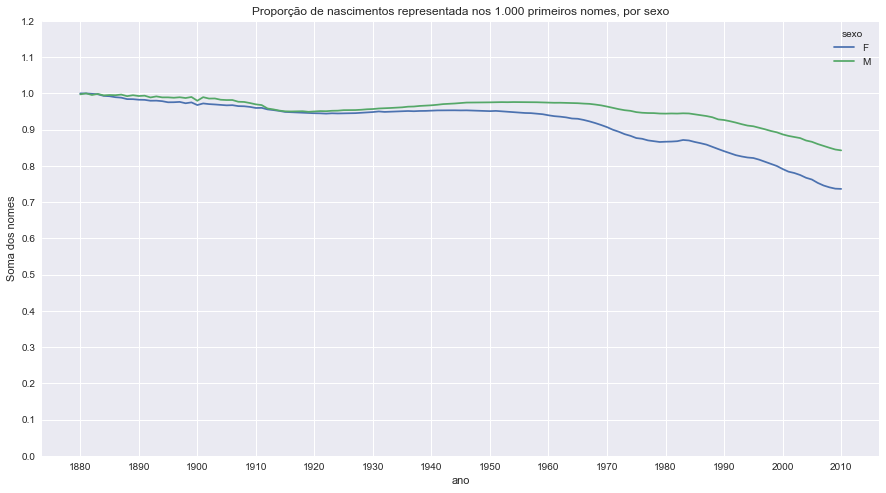

In [39]:
table.plot(title='Proporção de nascimentos representada nos 1.000 primeiros nomes, por sexo', yticks=np.linspace(0, 1.2 ,13), \
           xticks = range(1880, 2020,10), ylabel='Soma dos nomes', figsize=(15,8))
plt.show()

### Podemos ver que, realmente, parece haver um aumento na diversidade dos nomes. 
### Mais pais estão colocando diferentes nomes em seus filhos

In [40]:
# Agora vou considerar apenas meninos nascidos em 2010 para analisar os nomes dos mais populares para os menos populares
df_meninos = meninos[meninos.ano == 2010]

In [41]:
df_meninos

,nome,sexo,quantidade,ano,porcentagem
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [42]:
# Aqui vou mostrar quantos nomes mais populares são necessários para alcançar 50% 
porcen_soma_acumulada = df_meninos.sort_values(by ='porcentagem', ascending=False).porcentagem.cumsum()

In [43]:
porcen_soma_acumulada[:10]

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065185
260883    0.073453
260884    0.081559
260885    0.089644
Name: porcentagem, dtype: float64

In [44]:
# São necessarios 116 nomes para alcançar 50%
porcen_soma_acumulada.values.searchsorted(0.5)

116

In [45]:
# Aqui mostro o mesmo pensamento só que em 1900
df_1900 = meninos[meninos.ano == 1900]
in1900 = df_1900.sort_values(by = 'porcentagem',ascending=False).porcentagem.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [46]:
# Agora com esse DataFrame resultante temos duas séries temporais, uma para cada sexo, indexada por ano
def combinacao(group,q=0.5):
    group = group.sort_values(by='porcentagem', ascending=False)
    return group.porcentagem.cumsum().values.searchsorted(q)+1

diversidade = top_mil.groupby(['ano','sexo']).apply(combinacao)
diversidade = diversidade.unstack('sexo')

In [47]:
diversidade

sexo,F,M
ano,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,210,99
2007,223,103
2008,234,109


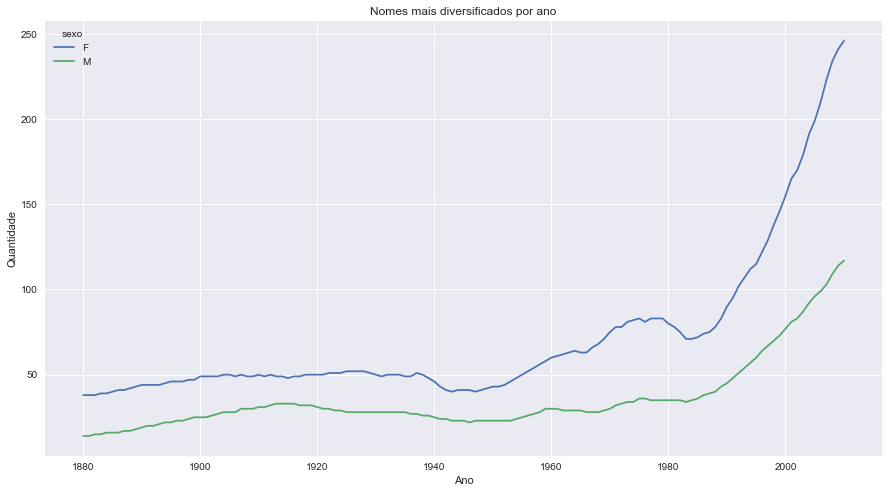

In [48]:
diversidade.plot(title='Nomes mais diversificados por ano', xlabel='Ano', ylabel='Quantidade', figsize=(15,8))
plt.show()

### Como podemos ver, os nomes de meninas têm sido smepre mais diversificados que os nomes de meninos.

## A Revolução da ultima letra

In [49]:
# Agora vamos analisar a mudança da última letra dos nomes
# Extrai a última letra da coluna de nomes
pegar_ultima_letra = lambda x:x[-1]
ultima_letra = nomes_babys.nome.map(pegar_ultima_letra)
ultima_letra.nome = 'ultima_letra'

tabela = nomes_babys.pivot_table('quantidade', index=ultima_letra, columns=['sexo','ano'], aggfunc=sum)

In [50]:
#tabela

In [51]:
# Aqui vou pegar apenas três anos para a análise
tres_anos = tabela.reindex(columns=[1910,1960,2010], level='ano')
tres_anos.head()

sexo         F                            M                    
ano       1910      1960      2010     1910      1960      2010
nome                                                           
a     108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b          NaN     694.0     455.0    411.0    3910.0   39298.0
c          5.0      49.0     957.0    482.0   15456.0   23360.0
d       6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e     133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [52]:
tres_anos.sum()

sexo  ano 
F     1910     396505.0
      1960    2022001.0
      2010    1776223.0
M     1910     194209.0
      1960    2131990.0
      2010    1917416.0
dtype: float64

In [53]:
# Agora vou achar a porcentagem de cada letra final
letra_prop = tres_anos/tres_anos.sum()

In [54]:
letra_prop

sexo         F                             M                    
ano       1910      1960      2010      1910      1960      2010
nome                                                            
a     0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c     0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d     0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e     0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f          NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g     0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h     0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i     0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j          NaN       NaN  0.000093       NaN       NaN  0.000772
k     0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l     0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m     0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n     0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o     0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p     0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q          NaN       NaN  0.000030       NaN       NaN  0.000180
r     0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s     0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t     0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u     0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v          NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w     0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x     0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y     0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z     0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<AxesSubplot:title={'center':'Meninas'}, xlabel='Ultima Letra', ylabel='Porcentagem'>

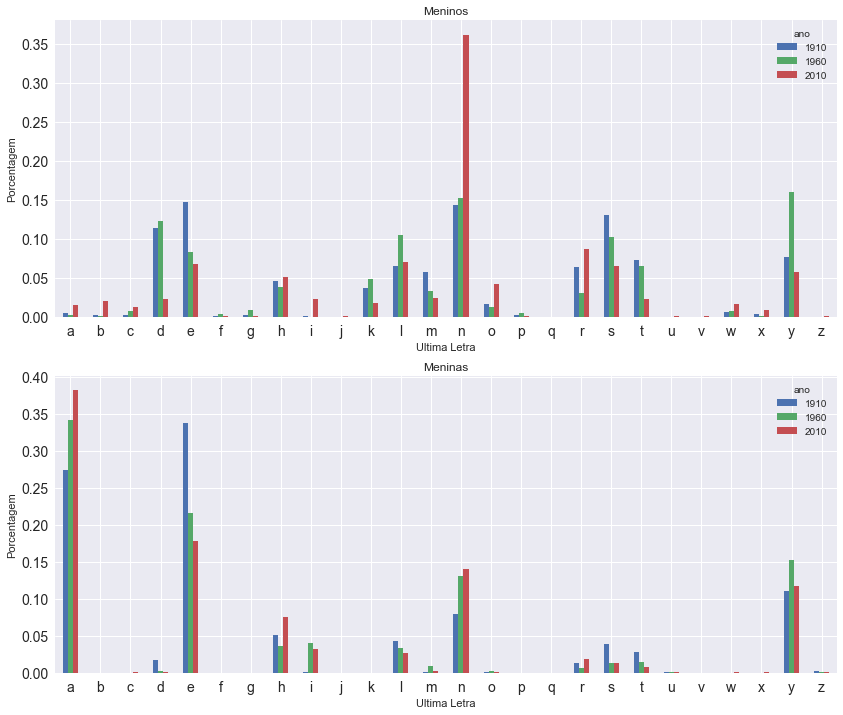

In [55]:

fig, axes=plt.subplots(2,1,figsize=(14,12))
letra_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title="Meninos",xlabel='Ultima Letra', ylabel = 'Porcentagem',fontsize = 14)
letra_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title="Meninas",xlabel='Ultima Letra', ylabel = 'Porcentagem',fontsize = 14)



### Com essa visualização conseguimos ver a proporção de nomes de meninos e de meninas que terminam com cada letra

In [56]:
# Agora vou pegar algumas letras para fazer um subconjunto de letras para nomes de meninos
letra_prop = tabela/tabela.sum()

dny_ts = letra_prop.loc[['d','n','y'],'M'].T

dny_ts.head()

nome,d,n,y
ano,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


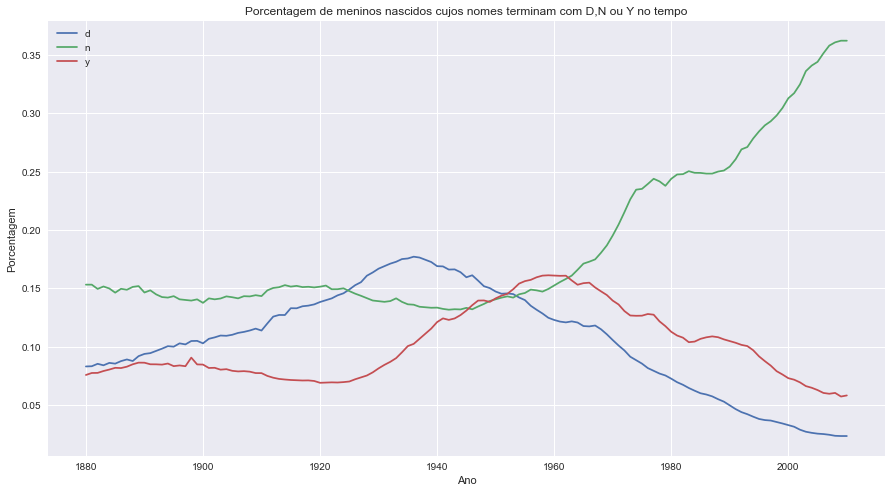

In [57]:
dny_ts.plot(title='Porcentagem de meninos nascidos cujos nomes terminam com D,N ou Y no tempo',\
            xlabel='Ano', ylabel='Porcentagem', figsize=(15,8))
plt.legend()
plt.show()

### Assim podemos análisar a proporção de nomes de meninos que terminam com as letras D,N e Y

## Agora por fim vou analisar a quantidade de nomes semelhantes

In [58]:
# primeiramente vou analisar nomes semelhantes a Gui
todos_nomes = pd.Series(top_mil.nome.unique())

gui = todos_nomes[todos_nomes.str.lower().str.contains('gui')]

In [59]:
gui

2996     Guilford
3073    Guillermo
3530        Guido
dtype: object

In [60]:
filter_gui = top_mil[top_mil.nome.isin(gui)]

filter_gui.groupby('nome').quantidade.sum()

nome
Guido         1885
Guilford         8
Guillermo    26875
Name: quantidade, dtype: int64

In [61]:
df_tabela = filter_gui.pivot_table('quantidade',index='ano',columns='sexo',aggfunc='sum')

#df_tabela = df_tabela.div(df_tabela.sum(1),axis=0)

In [62]:
df_tabela

sexo,M
ano,
1890,8
1892,8
1904,10
1905,10
1909,14
...,...
2006,620
2007,609
2008,583


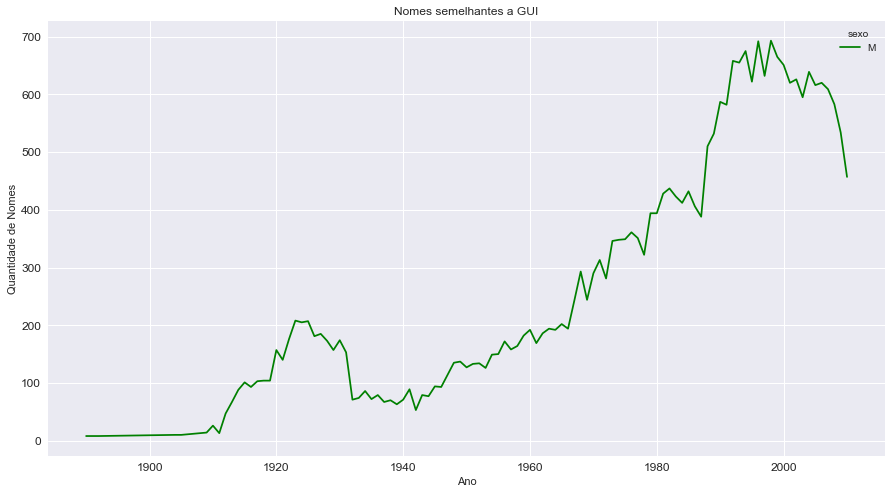

In [63]:
df_tabela.plot(figsize=(15,8), style={'M':'g-','F':'m-'}, title='Nomes semelhantes a GUI', fontsize=12, xlabel="Ano",\
              ylabel = 'Quantidade de Nomes')

plt.show()


In [64]:
# Agora vou analisar nomes semelhantes a LesLey
todos_nomes2 = pd.Series(top_mil.nome.unique())
lesl = todos_nomes2[todos_nomes.str.lower().str.contains('lesl')]
lesl

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [65]:
filter_lesl = top_mil[top_mil.nome.isin(lesl)]

filter_lesl.groupby('nome').quantidade.sum()

nome
Leslee      1082
Lesley     35038
Lesli        929
Leslie    370581
Lesly      10072
Name: quantidade, dtype: int64

In [66]:
lesl_tabela = filter_lesl.pivot_table('quantidade',index='ano',columns='sexo',aggfunc='sum')

lesl_tabela = lesl_tabela.div(lesl_tabela.sum(1),axis=0)

In [67]:
lesl_tabela

sexo,F,M
ano,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


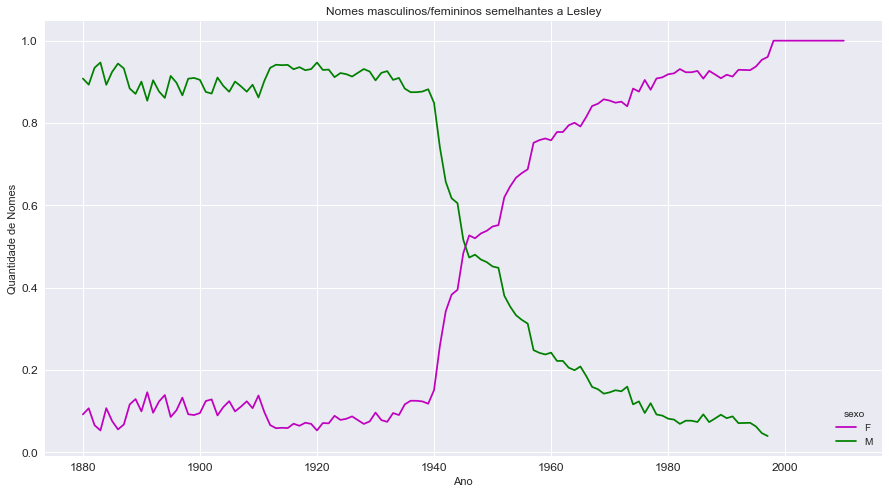

In [68]:
lesl_tabela.plot(figsize=(15,8), style={'M':'g-','F':'m-'}, title='Nomes masculinos/femininos semelhantes a Lesley',\
                 fontsize=12, xlabel="Ano",\
              ylabel = 'Quantidade de Nomes')

plt.show()

## Para a conclusão final, podemos analisar que nomes semelhantes a Lesley eram usados em meninos de 1880 até 1940.
## Depois esses nomes estavam sendo dados em meninas, que até ultrapassou a quantidade de meninos